In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('\nName:- Abhishikth Boda')
print('Roll Number:- S20210010044')
print('Course:- Machine Learning')
print('Section:- 2')
print('Assignment Number:- 9')
print('Date:- 26th October 2023\n')

print('Program is being executed\n')


Name:- Abhishikth Boda
Roll Number:- S20210010044
Course:- Machine Learning
Section:- 2
Assignment Number:- 9
Date:- 26th October 2023

Program is being executed



In [2]:
np.random.seed(0)
n_values = np.arange(100, 1100, 100)
X1 = np.random.uniform(1, 15, size=1100)
X2 = np.random.uniform(2, 6, size=1100)
epsilon = np.random.normal(0, 0.3, size=1100)
t = 4 + X1 + 3 * X2 + epsilon

train_errors = []
test_errors = []

bias_values = []
variance_values = []

def linear_regression(X, y):
    X = np.column_stack((np.ones(X.shape[0]), X))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [3]:
for n in n_values:
    t_train_preds = []
    t_test_preds = []

    for _ in range(10):  
        indices = np.random.choice(1100, size=n, replace=False)
        X_train = np.column_stack((X1[indices], X2[indices]))
        t_train = t[indices]
        X_test = np.column_stack((X1[100:200], X2[100:200]))
        t_test = t[100:200]


        w = linear_regression(X_train, t_train)

        t_train_pred = np.dot(np.column_stack((np.ones(X_train.shape[0]), X_train)), w)
        t_test_pred = np.dot(np.column_stack((np.ones(X_test.shape[0]), X_test)), w)

        t_train_preds.append(t_train_pred)
        t_test_preds.append(t_test_pred)

    train_errors.append(np.mean((np.mean(t_train_preds, axis=0) - t_train) ** 2))
    test_errors.append(np.mean((np.mean(t_test_preds, axis=0) - t_test) ** 2))

for i in range(len(n_values)):
    bias = (np.mean(t_train) - np.mean(t_train_preds[i]))**2
    variance = np.mean((t_train_preds[i] - np.mean(t_train_preds[i]))**2)

    bias_values.append(bias)
    variance_values.append(variance)

for i, n in enumerate(n_values):
    print(f"Training Set Size (n = {n}):")
    print(f"Bias: {bias_values[i]:.4f}")
    print(f"Variance: {variance_values[i]:.4f}")
    print("")

Training Set Size (n = 100):
Bias: 0.0025
Variance: 29.3683

Training Set Size (n = 200):
Bias: 0.0028
Variance: 29.1032

Training Set Size (n = 300):
Bias: 0.0026
Variance: 29.0434

Training Set Size (n = 400):
Bias: 0.0112
Variance: 29.5144

Training Set Size (n = 500):
Bias: 0.0048
Variance: 28.4158

Training Set Size (n = 600):
Bias: 0.0005
Variance: 28.5788

Training Set Size (n = 700):
Bias: 0.0018
Variance: 28.6199

Training Set Size (n = 800):
Bias: 0.0000
Variance: 29.6220

Training Set Size (n = 900):
Bias: 0.0034
Variance: 28.6941

Training Set Size (n = 1000):
Bias: 0.0000
Variance: 28.9366



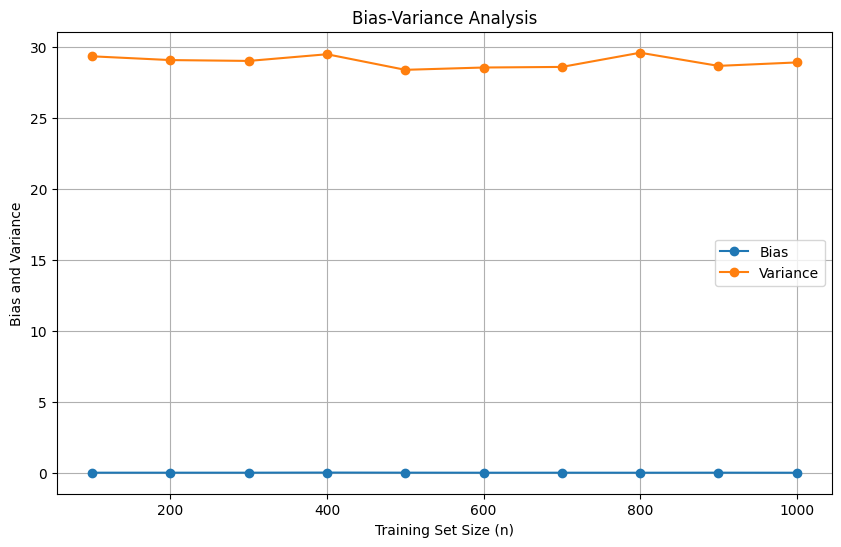

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(n_values, bias_values, label='Bias', marker='o')
plt.plot(n_values, variance_values, label='Variance', marker='o')
plt.xlabel('Training Set Size (n)')
plt.ylabel('Bias and Variance')
plt.title('Bias-Variance Analysis')
plt.legend()
plt.grid(True)
plt.show()
